In this example we will consider the mechanism of interaction with API of FEDOT.Industrial framework to solve the problem of time series classification

First of all, it is necessary to import the base class FedotIndustrial and determine the parameters of the experiment

In [1]:
from fedot_ind.core.architecture.preprocessing.DatasetLoader import DataLoader
from fedot_ind.api.main import FedotIndustrial

The parameters of the experiment are:

In [14]:
industrial = FedotIndustrial(task='ts_classification',
                             dataset='ItalyPowerDemand',
                             strategy='quantile',
                             use_cache=False,
                             timeout=15,
                             n_jobs=2,
                             logging_level=20)

2023-07-27 18:09:23,765 - Initialising experiment setup
2023-07-27 18:09:23,767 - Experiment setup:
2023-07-27 18:09:23,768 - task - ts_classification
2023-07-27 18:09:23,769 - dataset - ItalyPowerDemand
2023-07-27 18:09:23,770 - strategy - quantile
2023-07-27 18:09:23,771 - use_cache - False
2023-07-27 18:09:23,772 - Initialising solver
2023-07-27 18:09:23,774 - TimeSeriesClassifier initialised


Now we must download the dataset. It could be done by using `DataReader` class that implemented as attribute of `FedotIndustrial` class. This class firstly tries to read the data from local project folder `data` and then if it is not possible, it downloads the data from the UCR/UEA archive. The data will be saved in the `data` folder.

In [15]:
train_data, test_data = DataLoader(dataset_name='ECG5000').load_data()

2023-07-27 18:09:24,715 - Reading data from /Users/technocreep/Desktop/Working-Folder/fedot-industrial/Fedot.Industrial/data/ECG5000
2023-07-27 18:09:24,877 - Data readed successfully from local folder


Next steps are quite straightforward. We need to fit the model and then predict the values for the test data just like for any other model in sklearn.

At the `fit` stage FedotIndustrial will transform initial time series data into features dataframe and will train Fedot classification model.

In [16]:
model = industrial.fit(features=train_data[0],
                       target=train_data[1])

2023-07-27 18:09:25,530 - Fitting model
2023-07-27 18:09:32,093 - AssumptionsHandler - Initial pipeline fitting started
2023-07-27 18:09:33,149 - AssumptionsHandler - Initial pipeline was fitted successfully
2023-07-27 18:09:33,151 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 0.4 MiB, max: 1.0 MiB
2023-07-27 18:09:33,153 - ApiComposer - Initial pipeline was fitted in 1.1 sec.
2023-07-27 18:09:33,156 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-07-27 18:09:33,168 - ApiComposer - AutoML configured. Parameters tuning: False. Time limit: 15 min. Set of candidate models: ['poly_features', 'scaling', 'logit', 'knn', 'mlp', 'lgbm', 'normalization', 'fast_ica', 'qda', 'rf', 'bernb', 'dt', 'pca', 'isolation_forest_class', 'resample'].
2023-07-27 18:09:33,173 - ApiComposer - Pipeline composition started.
2023-07-27 18:09:33,176 - DataSourceSplitter - K-folds cross validation 

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]

2023-07-27 18:09:33,181 - MultiprocessingDispatcher - Number of used CPU's: 2
2023-07-27 18:09:48,762 - MultiprocessingDispatcher - 3 individuals out of 3 in previous population were evaluated successfully.
2023-07-27 18:09:48,772 - EvoGraphOptimizer - Generation num: 1 size: 3
2023-07-27 18:09:48,775 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<roc_auc_pen=-0.939 node_number=0.200>']
2023-07-27 18:09:55,692 - MultiprocessingDispatcher - Number of used CPU's: 2
2023-07-27 18:09:55,708 - PipelineObjectiveEvaluate - Unsuccessful pipeline fit during fitness evaluation. Skipping the pipeline. Exception <Input X contains infinity or a value too large for dtype('float32').> on (/n_isolation_forest_class;)/n_rf_{'n_jobs': 1}
2023-07-27 18:09:56,667 - PipelineObjectiveEvaluate - Unsuccessful pipeline fit during fitness evaluation. Skipping the pipeline. Exception <Input X contains infinity or a value too large for dtype('float32').> on /n_rf_{'n_jobs': 1}
2023-07-

Generations:   0%|          | 1/10000 [19:08<?, ?gen/s]

2023-07-27 18:28:41,789 - OptimisationTimer - Composition time: 19.144 min
2023-07-27 18:28:41,793 - OptimisationTimer - Algorithm was terminated due to processing time limit
2023-07-27 18:28:41,803 - EvoGraphOptimizer - Generation num: 10 size: 1
2023-07-27 18:28:41,805 - EvoGraphOptimizer - Best individuals: HallOfFame archive fitness (1): ['<roc_auc_pen=-0.945 node_number=0.100>']
2023-07-27 18:28:41,808 - EvoGraphOptimizer - no improvements for 2 iterations
2023-07-27 18:28:41,812 - EvoGraphOptimizer - spent time: 19.1 min
2023-07-27 18:28:41,819 - GPComposer - GP composition finished
2023-07-27 18:28:42,065 - ApiComposer - Model generation finished


2023-07-27 18:28:49,499 - FEDOT logger - Final pipeline was fitted
2023-07-27 18:28:49,502 - FEDOT logger - Final pipeline: {'depth': 1, 'length': 1, 'nodes': [catboost]}
catboost - {'allow_writing_files': False, 'verbose': False, 'max_depth': 8, 'learning_rate': 0.0721852287559151, 'min_data_in_leaf': 28.0, 'border_count': 62, 'l2_leaf_reg': 1.1440937570682182e-05}
2023-07-27 18:28:49,504 - MemoryAnalytics - Memory consumption for finish in main session: current 1.2 MiB, max: 2.2 MiB
2023-07-27 18:28:49,516 - Solver fitted: quantile_extractor -> fedot_pipeline ({'depth': 1, 'length': 1, 'nodes': [catboost]})


The output of the `fit` method is the trained Fedot model in the form of `pipeline` that can be used for prediction.

Actually, we have access to it and are able to visualize:

{'depth': 1, 'length': 1, 'nodes': [catboost]}


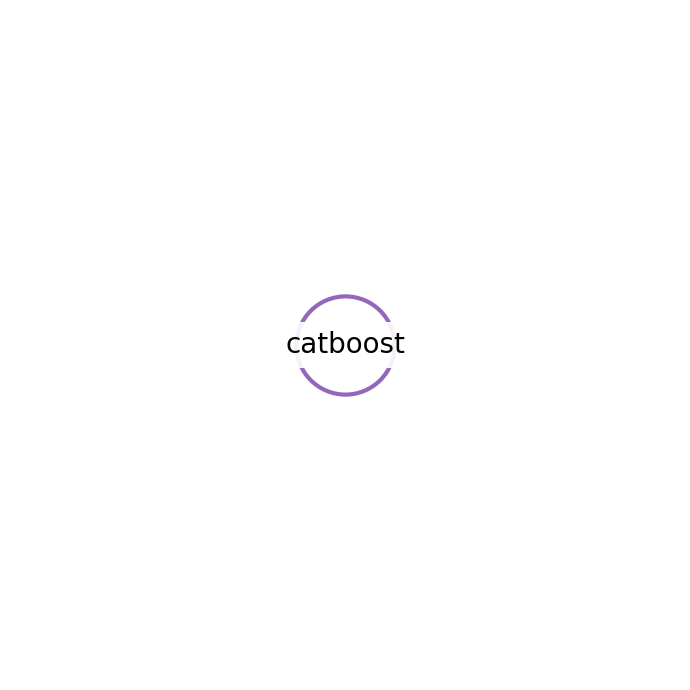

In [17]:
print(model.current_pipeline)

model.current_pipeline.show(node_size_scale=1)

Next, we can predict the values for the test data. In the case of time series classification, the output of the model is the predicted class for each time series in the test data or the probability of belonging to each class.

In [18]:
labels = industrial.predict(features=test_data[0])

print(labels)

2023-07-27 18:28:49,730 - Predicting with quantile generator
[[1]
 [1]
 [1]
 ...
 [2]
 [2]
 [4]]


In [19]:
probs = industrial.predict_proba(features=test_data[0])

print(probs)

2023-07-27 18:29:39,547 - Predicting with quantile generator
[[9.99999979e-01 4.52913547e-09 1.37947518e-08 1.21006395e-09
  1.10984978e-09]
 [1.00000000e+00 2.28019011e-11 5.25537647e-11 2.38789245e-10
  3.91549344e-11]
 [9.99999983e-01 1.02320415e-08 7.23849309e-10 5.50606589e-09
  6.64328762e-10]
 ...
 [3.41585910e-09 9.99999010e-01 3.60650414e-09 9.78457988e-07
  4.32197675e-09]
 [1.17373208e-09 9.99999680e-01 8.19526700e-10 3.17568428e-07
  8.33180984e-10]
 [3.77805304e-06 2.43269118e-07 5.72845944e-09 9.99995964e-01
  9.28216885e-09]]


At the end of the experiment we can obtain the desired metric values using `get_metrics` method. Now there are five available metrics for classification task:
- `f1`
- `roc_auc`
- `accuracy`
- `precision`
- `recall`.

Let's say we want to get the `f1` metric for the test data since ItalyPowerDemand dataset is multi-class.

In [20]:
metric = industrial.get_metrics(target=test_data[1],
                                metric_names=['f1'])
print(metric)

2023-07-27 18:30:28,681 - Calculating metrics: ['f1']
2023-07-27 18:30:28,693 - Metrics are: {'f1': 0.01}
{'f1': 0.01}


Also, there is an opportunity to save metrics, predicted labels and probabilities to the csv file:

In [21]:
for pred in [labels, probs]:
    industrial.save_predict(predicted_data=pred)

industrial.save_metrics(metrics=metric)

2023-07-27 18:30:28,699 - Saving predicted None to /Users/technocreep/Desktop/Working-Folder/fedot-industrial/Fedot.Industrial/results_of_experiments/quantile/ItalyPowerDemand
2023-07-27 18:30:28,701 - Can not save None type to /Users/technocreep/Desktop/Working-Folder/fedot-industrial/Fedot.Industrial/results_of_experiments/quantile/ItalyPowerDemand
2023-07-27 18:30:28,702 - Saving predicted None to /Users/technocreep/Desktop/Working-Folder/fedot-industrial/Fedot.Industrial/results_of_experiments/quantile/ItalyPowerDemand
2023-07-27 18:30:28,704 - Can not save None type to /Users/technocreep/Desktop/Working-Folder/fedot-industrial/Fedot.Industrial/results_of_experiments/quantile/ItalyPowerDemand
2023-07-27 18:30:28,705 - Saving predicted metrics to /Users/technocreep/Desktop/Working-Folder/fedot-industrial/Fedot.Industrial/results_of_experiments/quantile/ItalyPowerDemand
